In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carga de los datos

df_test = pd.read_csv("./new_classification_test.csv", sep = ",")
df_train = pd.read_csv("./new_classification_train.csv", sep = ",")

In [3]:
# Mostramos dataset de test
df_test

,id,headline,authors,short_description,date
0,0,Matt McGorry Is Trying To Turn Guys Like Him I...,Emma Gray,"Matt McGorry is a rising Hollywood star, with ...",2015-06-09
1,1,"As The Force Awakens, So Does John Boyega's Fame",Matthew Jacobs,"The new ""Star Wars"" lead will forever represen...",2015-12-15
2,2,The Consequence of Unenforced Ethical Guidelin...,"Mark Baer, Contributor\nMediator, Family Law A...",The story I am going to share with you is only...,2014-04-08
3,3,"In Investing, There Is No Free Lunch","Irene Aldridge, Contributor\nVisiting Professo...",Many articles on the subject of money talk abo...,2012-03-02
4,4,Hillary Clinton Wins A Resounding Victory In S...,Samantha Lachman,"Her opponent, Bernie Sanders, had struggled to...",2016-02-28
...,...,...,...,...,...
66277,66277,Colorado Governor Fights To Stave Off Republic...,NaN,NaN,2014-08-10
66278,66278,"Vintage Disney Photos: Disney World, Disneylan...",Lisa_Miller,Take a look back at vintage Disney in the slid...,2013-06-26
66279,66279,"Yes You Can - Memorable Places to Get ""Gay Mar...","offMetro, Contributor\nGet out of town, Car Op...",You can even have some fun assigning guest roo...,2013-07-23
66280,66280,U.S. Women's Soccer Star Abby Wambach Arrested...,Ryan Grenoble,"""I promise that I will do whatever it takes to...",2016-04-03


In [4]:
# Mostramos dataset de train
df_train

,id,headline,authors,short_description,date,category
0,0,Does Romans 13 Give The President The Right To...,"David J. Dunn, PhD, ContributorTheological tro...",Let any who doubt the lamentable state of theo...,2017-08-12,RELIGION
1,1,How To Throw A Marijuana-Friendly Wedding,NaN,Designate a pot-smoking area. While brides and...,2014-04-09,WEDDINGS
2,2,The New Yorker Finally Realized Us Plebeians D...,Katla McGlynn,NaN,2014-10-23,COMEDY
3,3,The 10 Best U.S. Cities For Retirement,"PureWow, ContributorWhat your girl crush reads...",Next question: When is too early to start coun...,2017-07-10,BUSINESS
4,4,"Justin Bieber Punches Man In The Face, Leaves ...",Carly Ledbetter,This fan got WAY too close for comfort.,2016-11-23,ENTERTAINMENT
...,...,...,...,...,...,...
134566,134566,Added Sugars Make Up 13 Percent Of U.S. Adults...,NaN,A recent study of added sugar consumption in k...,2013-05-01,WELLNESS
134567,134567,Must-Try Bohemian Trends,"W Magazine, Contributor\nW Magazine",Whether it was the suede dresses at Calvin Kle...,2013-11-27,STYLE & BEAUTY
134568,134568,From A Dad Who Supports Breastfeeding: My Boys...,"John Willey, Contributor\nBlogger, DaddysInCha...",What is this world coming to that people would...,2012-02-02,PARENTING
134569,134569,"Bikinis, Texas: Businessman Buys Bankersmith, ...",NaN,"The town was first established in 1913, when t...",2012-07-17,TRAVEL


Como podemos ver, los datos de train tienen una columna más respecto a los datos de test. Esta columna es la de la variable a predecir (category)

In [5]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df_train)

profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


Como podemos ver, el dataset está formado de 134.571 observaciones. 
En total, hay 37.743 celdas sin datos, por lo que vamos a tener que tener esto en cuenta.

La primera columna es un id, por lo que la podemos borrar, ya que no aporta nada de información, debido a que es un índice.

La segunda columna, es el headline. Hay 133.726 datos distintos y 3 faltantes, por lo que podemos concluir que hay algunos pocos headlines repetidos en el dataset.

Algo similar ocurre con la columna authors. Solo el 20% de los datos son distintos, por lo que hay autores que se repiten. Esto puede ser útil porque tal vez un autor tenga preferencia a escribir noticias de una categoría en particular. Además, un dato no menor es que faltan 24.477 datos de autores. 

En cuanto a la categoria short_description, podemos observar que en su gran mayoría son distintos, pero hay algunas descripciones que se repiten. Además, también hay un gran número de valores faltantes (13.263).

De la columna date podemos decir que hay muchos datos repetidos, ya que solo el 1.7% son valores distintos. Además, no falta ningún valor.

Por último, la columna category, es la de la variable a predecir, Hay 41 categorías distintas en todo el set de datos. 



In [6]:
# Llenamos datos faltantes de headline (Le ponemos "Unknown headline" cuando este es desconocido):
df_train['headline'].fillna('Unknown headline', inplace=True)
df_test['headline'].fillna('Unknown headline', inplace=True)

In [7]:
# Llenamos datos faltantes de short_description (Le ponemos "Unknown short description" cuando esta es desconocido):
df_train['short_description'].fillna('Unknown short description', inplace=True)
df_test['short_description'].fillna('Unknown short description', inplace=True)

In [8]:
# Llenamos datos faltantes de authors (Le ponemos "Unknown authors" cuando estos son desconocidos):
df_train['authors'].fillna('Unknown authors', inplace=True)
df_test['authors'].fillna('Unknown authors', inplace=True)

In [9]:
# Volvemos a hacer el report, para verificar que ya no hayan celdas faltantes
from pandas_profiling import ProfileReport

profile = ProfileReport(df_train)

profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


Como podemos ver, ahora hay 0 celdas faltantes

Ahora procederemos a eliminar la columna id de los datasets, ya que como explicamos antes, esta es una columna incremental, o sea, un índice, y por ende no aporta nada de información.

In [10]:
# Eliminamos columna de id
# Quitamos la columna id del dataframe porque vimos que era un id autoincremental, el cual era lo mismo que el índice de la fila, por lo tanto, no aportaba información.
df_train.drop(columns=['id'], axis=1, inplace=True)
df_test.drop(columns=['id'], axis=1, inplace=True)

In [11]:
# Verificamos que la columna id se haya eliminado del dataset.
df_train

,headline,authors,short_description,date,category
0,Does Romans 13 Give The President The Right To...,"David J. Dunn, PhD, ContributorTheological tro...",Let any who doubt the lamentable state of theo...,2017-08-12,RELIGION
1,How To Throw A Marijuana-Friendly Wedding,Unknown authors,Designate a pot-smoking area. While brides and...,2014-04-09,WEDDINGS
2,The New Yorker Finally Realized Us Plebeians D...,Katla McGlynn,Unknown short description,2014-10-23,COMEDY
3,The 10 Best U.S. Cities For Retirement,"PureWow, ContributorWhat your girl crush reads...",Next question: When is too early to start coun...,2017-07-10,BUSINESS
4,"Justin Bieber Punches Man In The Face, Leaves ...",Carly Ledbetter,This fan got WAY too close for comfort.,2016-11-23,ENTERTAINMENT
...,...,...,...,...,...
134566,Added Sugars Make Up 13 Percent Of U.S. Adults...,Unknown authors,A recent study of added sugar consumption in k...,2013-05-01,WELLNESS
134567,Must-Try Bohemian Trends,"W Magazine, Contributor\nW Magazine",Whether it was the suede dresses at Calvin Kle...,2013-11-27,STYLE & BEAUTY
134568,From A Dad Who Supports Breastfeeding: My Boys...,"John Willey, Contributor\nBlogger, DaddysInCha...",What is this world coming to that people would...,2012-02-02,PARENTING
134569,"Bikinis, Texas: Businessman Buys Bankersmith, ...",Unknown authors,"The town was first established in 1913, when t...",2012-07-17,TRAVEL


Ahora procederemos a cambiar el tipo de los datos, ya que como podemos ver en la siguiente celda de código, todas las variables son de tipo "object", cuando lo mejor sería que fueran de tipo string, ya que es el tipo de dato que mejor se adecua a las variables

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134571 entries, 0 to 134570
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   headline           134571 non-null  object
 1   authors            134571 non-null  object
 2   short_description  134571 non-null  object
 3   date               134571 non-null  object
 4   category           134571 non-null  object
dtypes: object(5)
memory usage: 5.1+ MB


In [13]:
# Cambiamos el tipo de los datos a string, ya que antes eran de tipo object, pero en realidad, todos deberían ser strings
df_train[['headline', 'authors', 'short_description', 'category', 'date']] = df_train[['headline', 'authors', 'short_description', 'category', 'date']].astype('string')
df_test[['headline', 'authors', 'short_description', 'date']] = df_test[['headline', 'authors', 'short_description', 'date']].astype('string')

In [14]:
# Verificamos que los tipos de datos se hayan cambiado correctamente
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134571 entries, 0 to 134570
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   headline           134571 non-null  string
 1   authors            134571 non-null  string
 2   short_description  134571 non-null  string
 3   date               134571 non-null  string
 4   category           134571 non-null  string
dtypes: string(5)
memory usage: 5.1 MB


Ahora continuaremos viendo los distintos valores de las variables:

In [15]:
# Hay 2309 fechas distintas en el dataset
df_train['date'].unique()

<StringArray>
['2017-08-12', '2014-04-09', '2014-10-23', '2017-07-10', '2016-11-23',
 '2015-08-17', '2012-06-06', '2017-10-19', '2013-11-30', '2012-05-02',
 ...
 '2017-04-23', '2017-08-06', '2018-03-01', '2018-03-11', '2018-03-25',
 '2018-04-01', '2018-03-10', '2017-11-25', '2017-11-18', '2017-10-22']
Length: 2309, dtype: string

In [16]:
# Hay 41 categorias distintas en el dataset
df_train['category'].unique()

<StringArray>
[      'RELIGION',       'WEDDINGS',         'COMEDY',       'BUSINESS',
  'ENTERTAINMENT',        'DIVORCE',   'QUEER VOICES',         'TRAVEL',
 'CULTURE & ARTS',      'WORLDPOST',         'IMPACT',   'BLACK VOICES',
       'WELLNESS', 'HEALTHY LIVING',     'WORLD NEWS',          'WOMEN',
      'PARENTING',        'PARENTS',        'SCIENCE',    'ENVIRONMENT',
       'POLITICS',   'FOOD & DRINK',        'COLLEGE',          'CRIME',
          'TASTE', 'ARTS & CULTURE',      'GOOD NEWS',          'STYLE',
     'WEIRD NEWS', 'STYLE & BEAUTY',          'GREEN',  'HOME & LIVING',
           'TECH',          'MEDIA',  'THE WORLDPOST',         'SPORTS',
           'ARTS',          'MONEY',  'LATINO VOICES',          'FIFTY',
      'EDUCATION']
Length: 41, dtype: string

Ahora realizaremos un histograma, para ver bien cuáles son las categorías más repetidas

<AxesSubplot:>

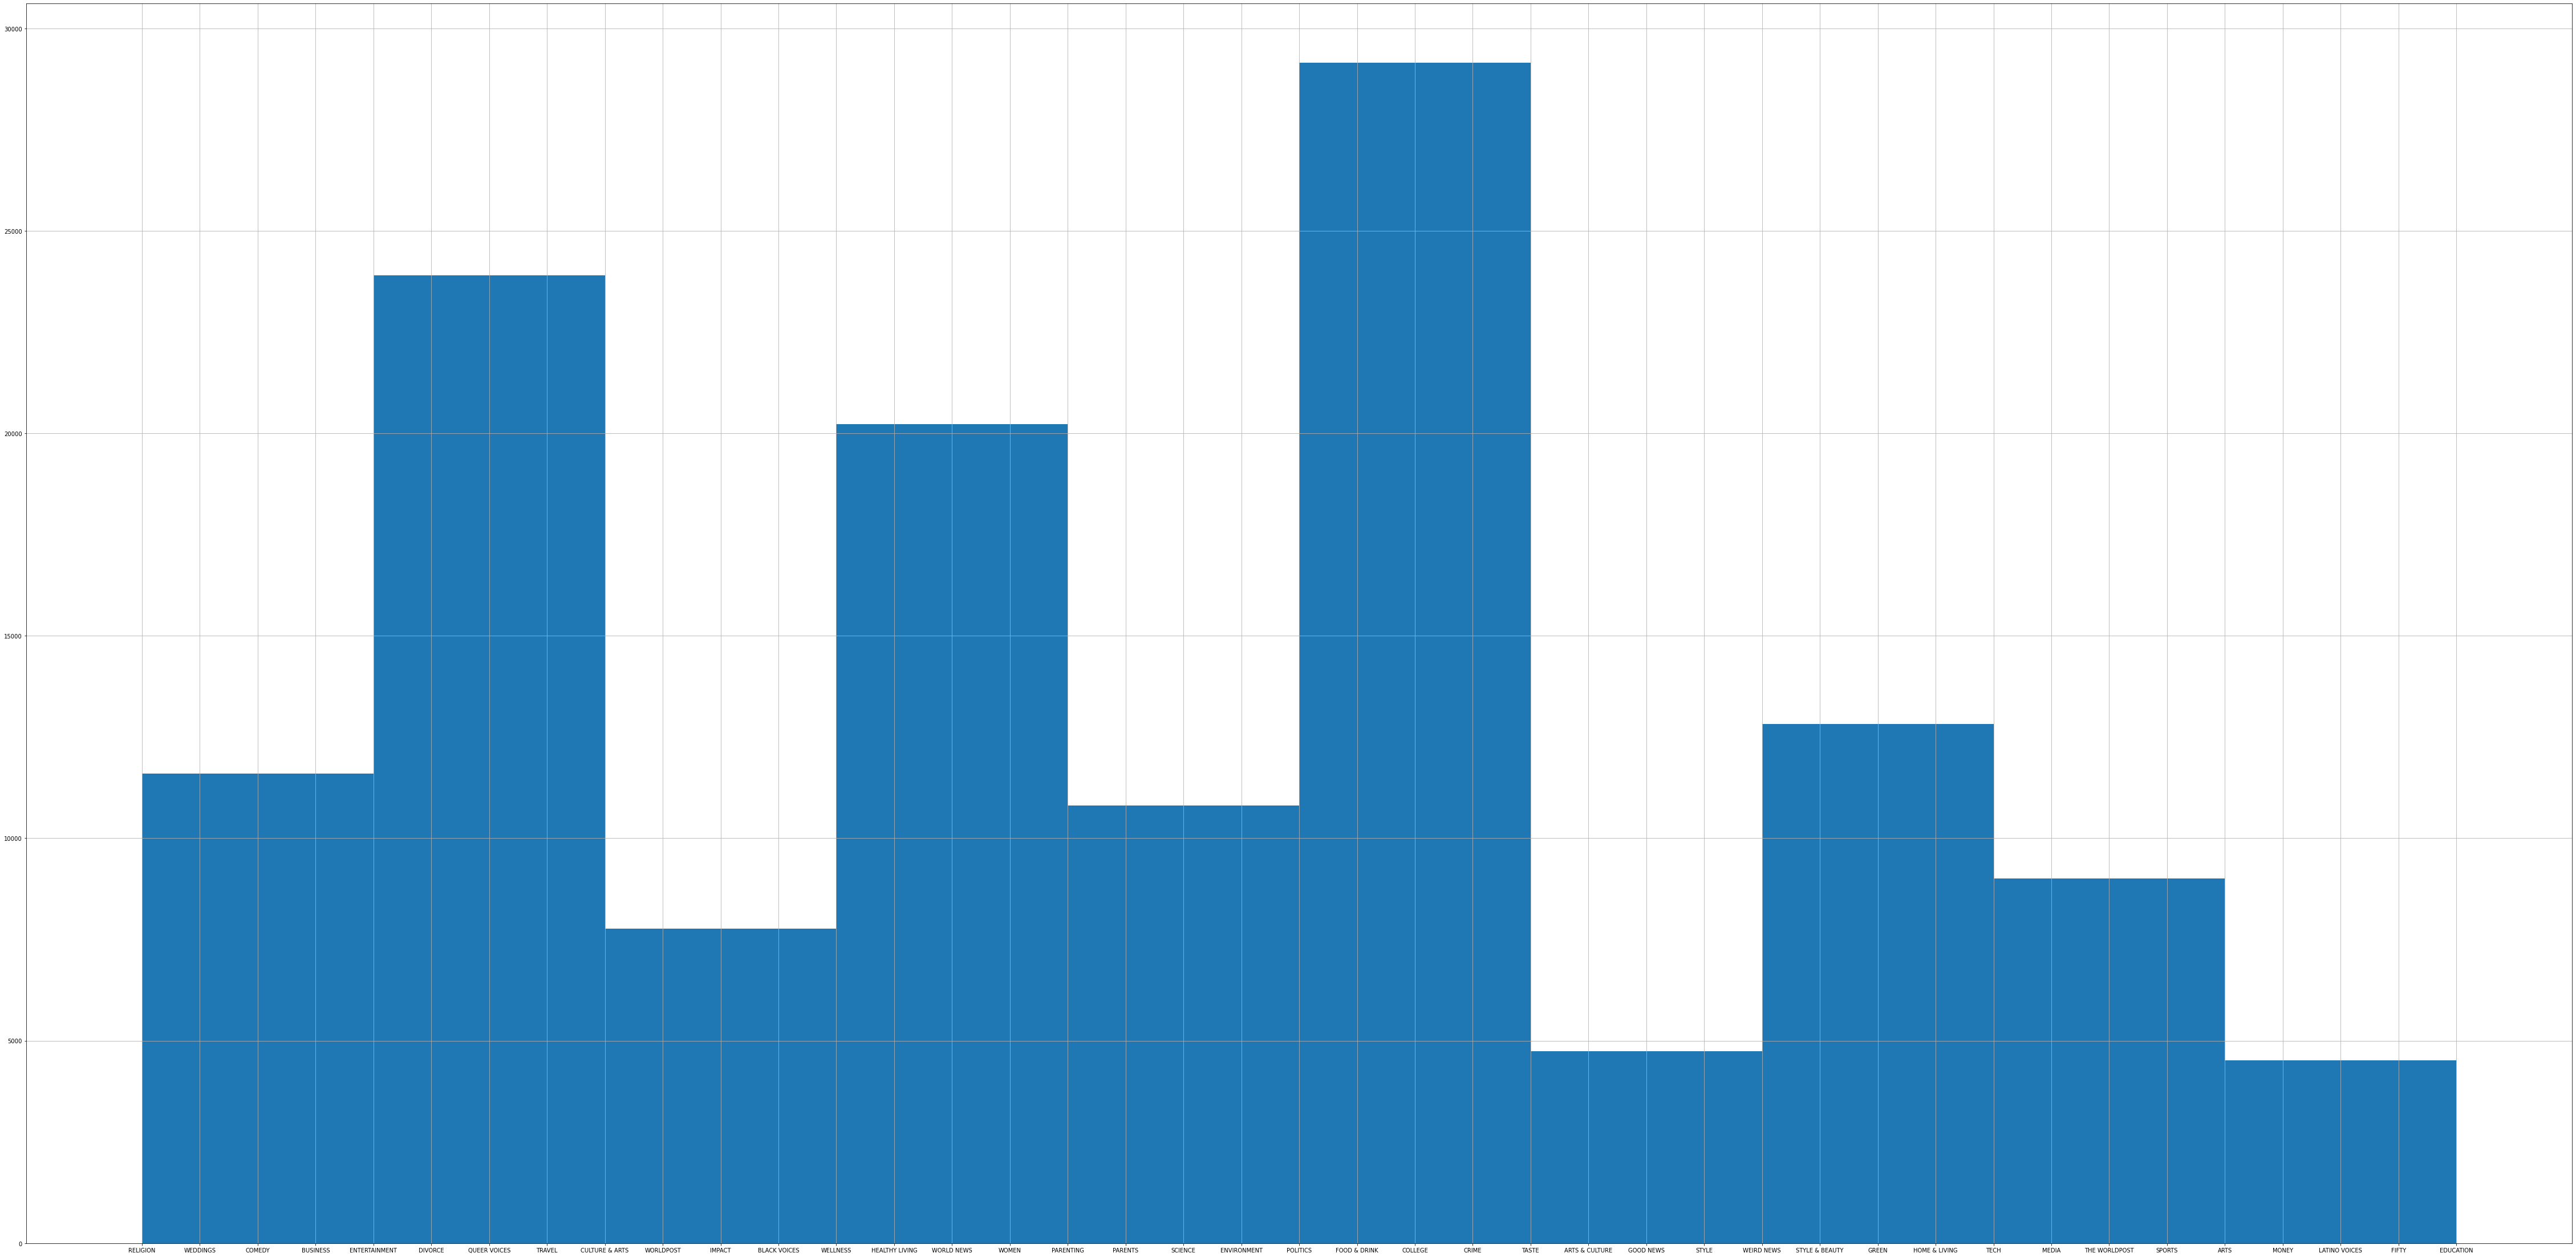

In [17]:
plt.figure(figsize=(80,40))
df_train['category'].hist()

<AxesSubplot:xlabel='category', ylabel='count'>

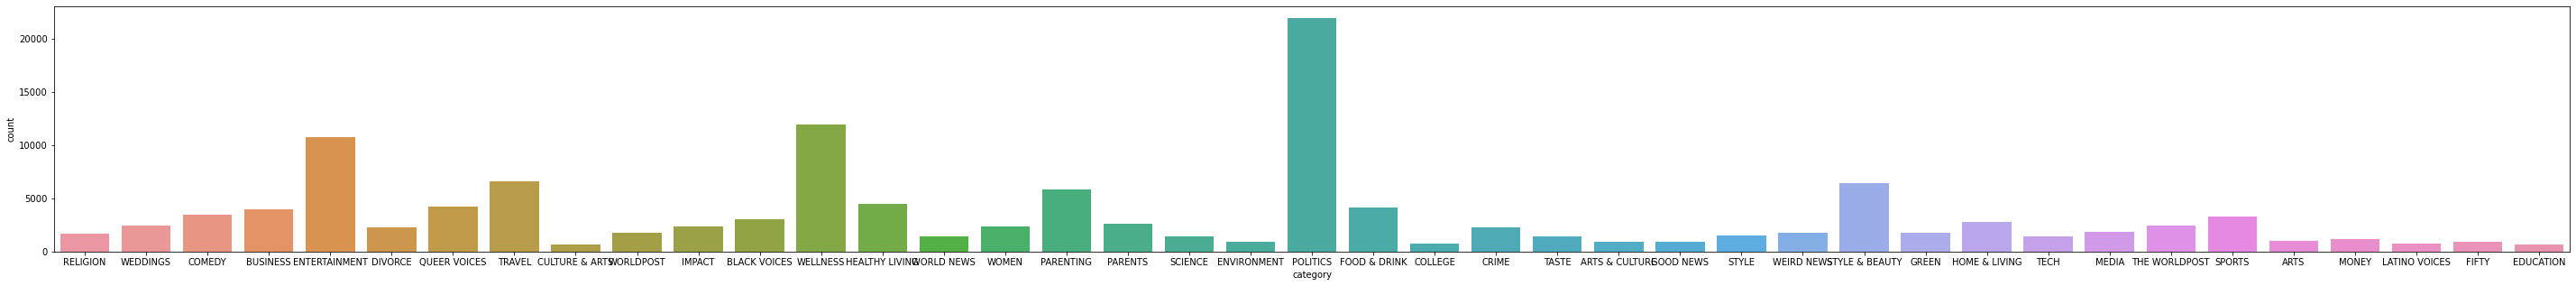

In [18]:
#Countplot por categoria
plt.figure(figsize=(50,5))
sns.countplot(data=df_train, x='category')

Como podemos observar, la mayoría de noticias son de la categoría política

El histograma nos da una noción global de como es la distribución de "category". Los valores más frecuentes son:

1 - Politics (21935)

2 - Wellness (11944)

3 - Entertainment (10759)

## VECTORIZACIÓN

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

### Vectorización de headlines

In [20]:
headlines_corpus = list(df_train['headline'])
headlines_corpus_test = list(df_test['headline'])

headline_vectorizer = CountVectorizer(stop_words='english', dtype=np.int32, lowercase=True, max_features=1000, max_df=0.80).fit(headlines_corpus)
headline_vectorizer_test = CountVectorizer(stop_words='english', dtype=np.int32, lowercase=True, max_features=1000, max_df=0.80).fit(headlines_corpus_test)

In [21]:
# Observamos las features vectorizadas
headline_vectorizer.get_feature_names()

['000',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '20',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '21',
 '24',
 '25',
 '30',
 '50',
 'abortion',
 'abuse',
 'according',
 'accused',
 'act',
 'action',
 'activists',
 'actor',
 'actress',
 'actually',
 'ad',
 'administration',
 'adorable',
 'advice',
 'africa',
 'age',
 'ahead',
 'air',
 'airport',
 'al',
 'album',
 'alleged',
 'allegedly',
 'amazing',
 'america',
 'american',
 'americans',
 'amid',
 'animal',
 'anniversary',
 'announces',
 'anti',
 'app',
 'apple',
 'aren',
 'arrested',
 'art',
 'artist',
 'ask',
 'asks',
 'assault',
 'attack',
 'attacks',
 'autism',
 'avoid',
 'awards',
 'away',
 'awesome',
 'babies',
 'baby',
 'bad',
 'ban',
 'bank',
 'battle',
 'beach',
 'beautiful',
 'beauty',
 'beer',
 'believe',
 'ben',
 'benefits',
 'bernie',
 'best',
 'better',
 'beyoncé',
 'biden',
 'big',
 'biggest',
 'billion',
 'birth',
 'birthday',
 'black',
 'blood',
 'blue',
 'body',
 'book',
 'books',
 

In [22]:
# Chequeamos que la cantidad de features es 1000, ya que es el máximo que le pusimos al vectorizer
len(headline_vectorizer.get_feature_names())

1000

In [23]:
# Tranformamos el corpus de headlines y luego mostramos la matriz
X_train_headlines = headline_vectorizer.transform(headlines_corpus)
X_test_headlines = headline_vectorizer_test.transform(headlines_corpus_test)
print(X_train_headlines.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Vectorización de short_description

Realizamos el mismo procedimiento pero esta vez para la columna "short_description"

In [24]:
short_description_corpus = list(df_train['short_description'])
short_description_corpus_test = list(df_test['short_description'])

shortDescription_vectorizer = CountVectorizer(stop_words='english', dtype=np.int32, lowercase=True,max_features=1000, max_df=0.80, ).fit(short_description_corpus)
shortDescription_vectorizer_test = CountVectorizer(stop_words='english', dtype=np.int32, lowercase=True,max_features=1000, max_df=0.80, ).fit(short_description_corpus_test)

In [25]:
shortDescription_vectorizer.get_feature_names()

['000',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '18',
 '20',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '24',
 '25',
 '30',
 '40',
 '50',
 'ability',
 'able',
 'abuse',
 'access',
 'according',
 'accused',
 'act',
 'action',
 'actions',
 'actor',
 'actress',
 'actually',
 'add',
 'address',
 'administration',
 'adults',
 'advice',
 'african',
 'age',
 'ago',
 'ahead',
 'air',
 'allow',
 'amazing',
 'america',
 'american',
 'americans',
 'angeles',
 'animal',
 'announced',
 'annual',
 'answer',
 'anti',
 'ap',
 'apparently',
 'appeared',
 'apple',
 'approach',
 'april',
 'area',
 'aren',
 'art',
 'article',
 'artist',
 'ask',
 'asked',
 'attack',
 'attacks',
 'attention',
 'attorney',
 'author',
 'average',
 'avoid',
 'awards',
 'aware',
 'awareness',
 'away',
 'baby',
 'bad',
 'based',
 'battle',
 'beach',
 'beautiful',
 'beauty',
 'bed',
 'began',
 'begin',
 'beginning',
 'behavior',
 'believe',
 'benefits',
 'best',
 'better',
 'big',
 'biggest',
 'billion',
 'birth',
 

In [26]:
len(shortDescription_vectorizer.get_feature_names())

1000

In [27]:
X_train_short_description = shortDescription_vectorizer.transform(short_description_corpus)
X_test_short_description = shortDescription_vectorizer_test.transform(short_description_corpus_test)
print(X_train_short_description.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Vectorización de authors

Realizamos el mismo procedimiento pero esta vez para la columna "authors". Realizamos esta vectorización para el primer modelo, ya que equívocamente observamos que un texto podía tener más de un author, y por lo tanto, creímos que era mejor hacer una vectorización, ya que podría contemplar que haya filas que tengan autores repetidos pero en distinto orden. Luego más adelante, nos dimos cuenta de que en realidad, habíamos cometido un error, ya que los textos solo contienen un autor, y por ende, dejamos de hacer la vectorización y pasamos a hacer un label encoder. Esto se va a explicar en más detalle adelante.

In [28]:
authors_corpus = list(df_train['authors'])
authors_corpus_test = list(df_test['authors'])

authors_vectorizer = CountVectorizer(stop_words='english', dtype=np.int32, lowercase=True, max_features=1000, max_df=0.80).fit(authors_corpus)
authors_vectorizer_test = CountVectorizer(stop_words='english', dtype=np.int32, lowercase=True, max_features=1000, max_df=0.80).fit(authors_corpus_test)

In [29]:
authors_vectorizer.get_feature_names()

['24',
 'aaron',
 'abbey',
 'abigail',
 'academ',
 'action',
 'activist',
 'actor',
 'actress',
 'adam',
 'adams',
 'adventure',
 'advisor',
 'advocate',
 'affairs',
 'ahmed',
 'airfarewatchdog',
 'akbar',
 'al',
 'alan',
 'alana',
 'alanna',
 'alena',
 'alex',
 'alexander',
 'alexandra',
 'alfred',
 'ali',
 'alison',
 'allen',
 'allison',
 'alman',
 'almendrala',
 'amanda',
 'amatulli',
 'ambassador',
 'amber',
 'america',
 'american',
 'amy',
 'analysis',
 'analyst',
 'anderson',
 'andrea',
 'andres',
 'andrew',
 'andy',
 'angeles',
 'angelo',
 'ann',
 'anna',
 'anne',
 'answer',
 'antonia',
 'ap',
 'appetit',
 'arab',
 'arianna',
 'ariel',
 'art',
 'arthur',
 'artist',
 'arts',
 'ashley',
 'assistant',
 'associate',
 'associated',
 'association',
 'attorney',
 'auth',
 'author',
 'authority',
 'authors',
 'award',
 'barbara',
 'barrón',
 'based',
 'bassett',
 'becker',
 'belkin',
 'bellware',
 'ben',
 'bendery',
 'bennett',
 'beres',
 'berman',
 'bernstein',
 'best',
 'bestselling',

In [30]:
len(authors_vectorizer.get_feature_names())

1000

In [31]:
X_train_authors = authors_vectorizer.transform(authors_corpus)
X_test_authors = authors_vectorizer_test.transform(authors_corpus_test)
print(X_train_authors.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Ahora concatenamos los vectores de headlines, short_description y authors a los datasets

Además, le concatenamos a cada feature el nombre de la variable a la cual corresponde, ya que sino, podía ocurrir el riesgo de que se agreguen columnas con igual nombre, y esto luego cause que se lance una excepción más adelante al hacer el label encoder. Ya que por ejemplo, en el headline puede haber una palabra llamada "date", y si la concatenamos acá se va a agregar y por ende, el dataset va a quedar con dos columnas llamadas "date". Esto luego daría problemas al hacer el label encoder de date, ya que necesita que haya una sola columna con ese nombre.
Por lo tanto, le agregamos el prefijo de la variable. Por ejemplo: A las features del headline_vectorizer le concatenamos la palabra 'headline' al comienzo, para indicar que salió del headline

In [32]:
# TRAIN
headline_feature_names = ['headline' + elem for elem in headline_vectorizer.get_feature_names()]
shortDescription_feature_names = ['shortDescription' + elem for elem in shortDescription_vectorizer.get_feature_names()]
authors_feature_names = ['authors' + elem for elem in authors_vectorizer.get_feature_names()]
dfHeadline = pd.DataFrame.sparse.from_spmatrix(X_train_headlines, columns=headline_feature_names)
dfShortDescription = pd.DataFrame.sparse.from_spmatrix(X_train_short_description, columns=shortDescription_feature_names)
dfAuthors = pd.DataFrame.sparse.from_spmatrix(X_train_authors, columns=authors_feature_names)

In [33]:
# TEST
headline_feature_names_test = ['headline' + elem for elem in headline_vectorizer_test.get_feature_names()]
shortDescription_feature_names_test = ['shortDescription' + elem for elem in shortDescription_vectorizer_test.get_feature_names()]
authors_feature_names_test = ['authors' + elem for elem in authors_vectorizer_test.get_feature_names()]
dfHeadline_test = pd.DataFrame.sparse.from_spmatrix(X_test_headlines, columns=headline_feature_names_test)
dfShortDescription_test = pd.DataFrame.sparse.from_spmatrix(X_test_short_description, columns=shortDescription_feature_names_test)
dfAuthors_test = pd.DataFrame.sparse.from_spmatrix(X_test_authors, columns=authors_feature_names_test)

In [34]:
# Observamos el dataset de headline. Es decir, tiene como variables a las 1000 features que vectorizamos de headline. Y cada valor en las celdas indica cuantas veces apareció 
# dicha feature. 
dfHeadline

,headline000,headline10,headline100,headline11,headline12,headline13,headline14,headline15,headline16,headline17,...,headlineworst,headlineworth,headlinewrong,headlineyear,headlineyears,headlineyes,headlineyoga,headlineyork,headlineyoung,headlineyouth
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134566,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Hacemos lo mismo para el dataset de short description
dfShortDescription

,shortDescription000,shortDescription10,shortDescription100,shortDescription11,shortDescription12,shortDescription13,shortDescription14,shortDescription15,shortDescription18,shortDescription20,...,shortDescriptionwriting,shortDescriptionwritten,shortDescriptionwrong,shortDescriptionwrote,shortDescriptionyear,shortDescriptionyears,shortDescriptionyes,shortDescriptionyoga,shortDescriptionyork,shortDescriptionyoung
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Hacemos lo mismo para el dataset de short authors
dfAuthors

,authors24,authorsaaron,authorsabbey,authorsabigail,authorsacadem,authorsaction,authorsactivist,authorsactor,authorsactress,authorsadam,...,authorsyear,authorsyoga,authorsyork,authorsyoung,authorsyouth,authorszach,authorszeba,authorszogby,authorszuburbia,authorszupkus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Concatenamos los 3 datasets anteriores a los datasets originales
df_train = pd.concat([df_train, dfHeadline, dfShortDescription, dfAuthors], axis=1)
df_test = pd.concat([df_test, dfHeadline_test, dfShortDescription_test, dfAuthors_test], axis=1)

In [38]:
# Imprimimos el dataset de train para verificar que se hayan concatenado correctamente las features
df_train

,headline,authors,short_description,date,category,headline000,headline10,headline100,headline11,headline12,...,authorsyear,authorsyoga,authorsyork,authorsyoung,authorsyouth,authorszach,authorszeba,authorszogby,authorszuburbia,authorszupkus
0,Does Romans 13 Give The President The Right To...,"David J. Dunn, PhD, ContributorTheological tro...",Let any who doubt the lamentable state of theo...,2017-08-12,RELIGION,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,How To Throw A Marijuana-Friendly Wedding,Unknown authors,Designate a pot-smoking area. While brides and...,2014-04-09,WEDDINGS,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The New Yorker Finally Realized Us Plebeians D...,Katla McGlynn,Unknown short description,2014-10-23,COMEDY,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The 10 Best U.S. Cities For Retirement,"PureWow, ContributorWhat your girl crush reads...",Next question: When is too early to start coun...,2017-07-10,BUSINESS,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Justin Bieber Punches Man In The Face, Leaves ...",Carly Ledbetter,This fan got WAY too close for comfort.,2016-11-23,ENTERTAINMENT,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134566,Added Sugars Make Up 13 Percent Of U.S. Adults...,Unknown authors,A recent study of added sugar consumption in k...,2013-05-01,WELLNESS,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134567,Must-Try Bohemian Trends,"W Magazine, Contributor W Magazine",Whether it was the suede dresses at Calvin Kle...,2013-11-27,STYLE & BEAUTY,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134568,From A Dad Who Supports Breastfeeding: My Boys...,"John Willey, Contributor Blogger, DaddysInChar...",What is this world coming to that people would...,2012-02-02,PARENTING,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134569,"Bikinis, Texas: Businessman Buys Bankersmith, ...",Unknown authors,"The town was first established in 1913, when t...",2012-07-17,TRAVEL,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# Eliminamos columnas de headline, short_description y authors, ya que ya las vectorizamos, y por ende, ya no son de utilidad
df_train.drop(columns=['headline', 'short_description', 'authors'], inplace=True)
df_test.drop(columns=['headline', 'short_description', 'authors'], inplace=True)

In [40]:
# Verificamos que se hayan eliminado las 3 columnas anteriores
df_train

,date,category,headline000,headline10,headline100,headline11,headline12,headline13,headline14,headline15,...,authorsyear,authorsyoga,authorsyork,authorsyoung,authorsyouth,authorszach,authorszeba,authorszogby,authorszuburbia,authorszupkus
0,2017-08-12,RELIGION,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014-04-09,WEDDINGS,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014-10-23,COMEDY,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017-07-10,BUSINESS,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016-11-23,ENTERTAINMENT,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134566,2013-05-01,WELLNESS,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
134567,2013-11-27,STYLE & BEAUTY,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134568,2012-02-02,PARENTING,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134569,2012-07-17,TRAVEL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


En este punto, ya realizamos todas las vectorizaciones deseadeas. 

Como podemos ver, aún hay columnas que siguen siendo strings. Pero en vez de vectorizarlas consideramos que sería mas adecuado hacerles label encoder. Esto es porque son valores que se repiten, y que lo mejor sería asignarles un número para identificarlas. De esta manera, por ejemplo, una fecha de la columna "date" va a quedar representada siempre por el mismo número. En definitiva, lo que hacemos es mapear los distintos valores a números, para que luego los modelos puedan utilizarlos. 

## Label Encoders

In [41]:
from sklearn.preprocessing import LabelEncoder

### Label encoder para "date"


In [42]:
# Creamos una nueva instancia de un label encoder, para la variable "date"
dateLE = LabelEncoder()

In [43]:
# Hacemos la transformación de las fechas a números. Es decir, fechas iguales quedan con el mismo número.
df_train['date'] = dateLE.fit_transform(df_train['date'])
df_test['date'] = dateLE.fit_transform(df_test['date'])

In [44]:
# Verificamos que se haya hecho correctamente la transformación
df_train

,date,category,headline000,headline10,headline100,headline11,headline12,headline13,headline14,headline15,...,authorsyear,authorsyoga,authorsyork,authorsyoung,authorsyouth,authorszach,authorszeba,authorszogby,authorszuburbia,authorszupkus
0,2021,RELIGION,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,802,WEDDINGS,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,999,COMEDY,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1988,BUSINESS,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1761,ENTERTAINMENT,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134566,459,WELLNESS,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
134567,669,STYLE & BEAUTY,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134568,5,PARENTING,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
134569,171,TRAVEL,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### One-hot encoding para "category"

Para category no realizamos label encoder, sino que realizamos one-hot encoding.

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
# Creamos una nueva instancia de one-hot encoder
categoryOHE = OneHotEncoder(handle_unknown='ignore')

In [47]:
# Vemos las diferentes categorías
df_train['category'].unique()

<StringArray>
[      'RELIGION',       'WEDDINGS',         'COMEDY',       'BUSINESS',
  'ENTERTAINMENT',        'DIVORCE',   'QUEER VOICES',         'TRAVEL',
 'CULTURE & ARTS',      'WORLDPOST',         'IMPACT',   'BLACK VOICES',
       'WELLNESS', 'HEALTHY LIVING',     'WORLD NEWS',          'WOMEN',
      'PARENTING',        'PARENTS',        'SCIENCE',    'ENVIRONMENT',
       'POLITICS',   'FOOD & DRINK',        'COLLEGE',          'CRIME',
          'TASTE', 'ARTS & CULTURE',      'GOOD NEWS',          'STYLE',
     'WEIRD NEWS', 'STYLE & BEAUTY',          'GREEN',  'HOME & LIVING',
           'TECH',          'MEDIA',  'THE WORLDPOST',         'SPORTS',
           'ARTS',          'MONEY',  'LATINO VOICES',          'FIFTY',
      'EDUCATION']
Length: 41, dtype: string

In [48]:
categories = df_train['category'].to_numpy()
categories = categories.reshape(-1,1)
categories

array([['RELIGION'],
       ['WEDDINGS'],
       ['COMEDY'],
       ...,
       ['PARENTING'],
       ['TRAVEL'],
       ['STYLE']], dtype=object)

In [49]:
# Transformamos categorías a un one-hot
y = categoryOHE.fit_transform(categories).toarray()
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
# Imprimimos categorias de one hot encoder para verificar que haya quedado bien
categoryOHE.categories_

[array(['ARTS', 'ARTS & CULTURE', 'BLACK VOICES', 'BUSINESS', 'COLLEGE',
        'COMEDY', 'CRIME', 'CULTURE & ARTS', 'DIVORCE', 'EDUCATION',
        'ENTERTAINMENT', 'ENVIRONMENT', 'FIFTY', 'FOOD & DRINK',
        'GOOD NEWS', 'GREEN', 'HEALTHY LIVING', 'HOME & LIVING', 'IMPACT',
        'LATINO VOICES', 'MEDIA', 'MONEY', 'PARENTING', 'PARENTS',
        'POLITICS', 'QUEER VOICES', 'RELIGION', 'SCIENCE', 'SPORTS',
        'STYLE', 'STYLE & BEAUTY', 'TASTE', 'TECH', 'THE WORLDPOST',
        'TRAVEL', 'WEDDINGS', 'WEIRD NEWS', 'WELLNESS', 'WOMEN',
        'WORLD NEWS', 'WORLDPOST'], dtype=object)]

## ARMADO DE ÁRBOL DE DECISIÓN

### De profundidad máxima 3, criterio Gini

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
# Creamos una nueva instancia de arbol de decision
arbol = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [53]:
# Dividimos train en train y dev
from sklearn.model_selection import train_test_split

X_train_tree, X_dev_tree, Y_train_tree, Y_devtree = train_test_split(
    df_train.drop(['category'], axis=1),
    y,
    test_size=(0.1), random_state=42)

In [54]:
# Entrenamos árbol
arbol.fit(X_train_tree, Y_train_tree)

/opt/anaconda3/envs/clasemlsi/lib/python3.8/site-packages/sklearn/utils/validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


DecisionTreeClassifier(max_depth=3, random_state=0)

In [55]:
# Hacemos la predicción de dev set
Y_pred = arbol.predict(X_dev_tree)
Y_pred

/opt/anaconda3/envs/clasemlsi/lib/python3.8/site-packages/sklearn/utils/validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
# Vemos la accuracy del arbol
print("Accuracy Arbol:", accuracy_score(Y_pred, Y_devtree))

Accuracy Arbol: 0.08195868628325159


Como podemos ver con este árbol hemos llegado a resultados muy pobres, porque la accuracy sobre el dev set es de tan solo 8%

In [58]:
# Creamos función para setear a 1 el elemento más alto de un array, quedando el resto en 0.
def set_to_one(array):
 newArr = np.zeros(array.shape)
 newArr[array.argmax()] = 1
 return newArr

In [59]:
# Probamos nuestra función set_to_one
arr = np.array([0.1,0.2,0.3,0.8,0.5])
set_to_one(arr)

array([0., 0., 0., 1., 0.])

In [60]:
# Itera sobre la matriz, y a cada array de cada posicion lo convierte en un one-hot, seteando al elemento más alto en 1, y al resto 0
def set_to_one_row(matrix):
	for i in range(len(matrix)):
		row = matrix[i]
		matrix[i] = set_to_one(row)
	return matrix

In [61]:
# Recibe un modelo, un dataset, y un nombre de archivo. La función hace que el modelo haga una predicción a partir del dataset que se le pasa, y guarda los resultados en un archivo
# con el nombre recibido. 
def predict_then_save(model, X_test, filename):
    Y_pred = model.predict(X_test)
    print(Y_pred[0])
    Y_pred = set_to_one_row(Y_pred)
    Y_pred_decoded = categoryOHE.inverse_transform(Y_pred).astype(str).reshape(-1)
    with open(filename, 'w') as f:
        f.write('id,category\n')
        for i, pred in enumerate(Y_pred_decoded):
            f.write(str(i) + ',' + str(pred) + '\n')

In [62]:
predict_then_save(arbol, df_test, 'submission_arbol.csv')

/opt/anaconda3/envs/clasemlsi/lib/python3.8/site-packages/sklearn/utils/validation.py:515: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## ARMADO DE REDES NEURONALES

In [63]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
# Creamos función para crear una red neuronal. Esta recibe:
# input shape (dimension de la input layer)
# Array de output shapes (cada índice corresponde a la dimension de salida de cada capa. Ejemplo la dimension de salida de la input layer va a estar en el índice 0 de este array
# booleano para indicar si se usa bias o no. 
# Array de activations. Es un array de funciones de activaciones que se desean usar para cada capa. La ultima debe ser siempre "softmax", ya que es un problema de clasificacion multiclase
# Loss: función de perdida. En nuestro caso va a ser siempre categorical_crossentropy, ya que es un problema de clasificación multiclase..
# Metrica: Que metrica queremos mostrar cuando entrenemos a la red neuronal
# También recibe un optimizador, y dropouts (mecanismo para evitar sobreajuste)
def make_NN_model(output_shapes, input_shape, use_bias, activations, dropouts, optimizer, loss, metric):
    model = Sequential()
    layers = len(output_shapes)
    for i in range(0, layers):
        if i == 0:
            model.add(Dense(output_shapes[i], input_shape=(input_shape,), use_bias=use_bias))
        else: 
            model.add(Dense(output_shapes[i], use_bias=use_bias))
            model.add(Activation(activations[i]))
        if dropouts[i] != None:
            model.add(dropouts[i])
    model.compile(loss=loss, optimizer=optimizer, metrics=[metric])
    return model

### Primera red neuronal

In [65]:
# Creamos nuestra primera red neuronal
model = make_NN_model(
  output_shapes=[25, 35, Y_train_tree.shape[1]],
  input_shape=len(df_train.drop(['category'], axis=1).columns),
  use_bias=True,
  activations=[LeakyReLU(alpha=0.3), LeakyReLU(alpha=0.3), 'softmax'],
  dropouts=[Dropout(0.3), None, None],
  optimizer='Adam',
  loss='categorical_crossentropy',
  metric='accuracy' 
)

In [66]:
# Vemos las capas de nuestro modelo:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75050     
                                                                 
 dropout (Dropout)           (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 35)                910       
                                                                 
 activation (Activation)     (None, 35)                0         
                                                                 
 dense_2 (Dense)             (None, 41)                1476      
                                                                 
 activation_1 (Activation)   (None, 41)                0         
                                                                 
Total params: 77,436
Trainable params: 77,436
Non-traina

In [67]:
# Entrenamos al modelo. Además, creamos una nueva instancia de early stopping para evitar el sobreajuste
early_stopping = EarlyStopping(monitor='accuracy', patience=5)
model.fit(X_train_tree, Y_train_tree, epochs=2000, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/2000
3028/3028 [==============================] - 6s 2ms/step - loss: 2.6509 - accuracy: 0.3850 - val_loss: 1.7090 - val_accuracy: 0.5483
Epoch 2/2000
3028/3028 [==============================] - 5s 2ms/step - loss: 1.6687 - accuracy: 0.5580 - val_loss: 1.5711 - val_accuracy: 0.5725
Epoch 3/2000
3028/3028 [==============================] - 5s 2ms/step - loss: 1.4841 - accuracy: 0.6012 - val_loss: 1.3912 - val_accuracy: 0.6223
Epoch 4/2000
3028/3028 [==============================] - 5s 2ms/step - loss: 1.3943 - accuracy: 0.6218 - val_loss: 1.3341 - val_accuracy: 0.6424
Epoch 5/2000
3028/3028 [==============================] - 5s 2ms/step - loss: 1.3458 - accuracy: 0.6335 - val_loss: 1.3480 - val_accuracy: 0.6363
Epoch 6/2000
3028/3028 [==============================] - 5s 2ms/step - loss: 1.3095 - accuracy: 0.6411 - val_loss: 1.3161 - val_accuracy: 0.6408
Epoch 7/2000
3028/3028 [==============================] - 5s 2ms/step - loss: 1.2817 - accuracy: 0.6475 - val_loss: 1.2197 -

In [68]:
# Hacemos una prediccion del modelo, a partir del dev set
Y_pred_model = model.predict(X_dev_tree)
Y_pred_model

array([[2.1961333e-07, 9.7462733e-04, 1.3779583e-02, ..., 5.2082911e-04,
        5.1452126e-04, 1.0811954e-06],
       [4.1101821e-04, 3.5971854e-04, 1.5173045e-01, ..., 5.2280622e-03,
        3.3920419e-03, 8.8190120e-03],
       [4.3251617e-05, 1.9428844e-05, 4.8513833e-02, ..., 1.3082779e-03,
        3.6246612e-04, 4.6128724e-03],
       ...,
       [2.6358908e-05, 2.0508791e-05, 5.3510227e-04, ..., 8.0492091e-04,
        1.3039557e-02, 2.0607704e-01],
       [2.0864709e-04, 3.3941909e-05, 1.2749707e-02, ..., 8.2296517e-04,
        5.9692820e-06, 6.8268290e-04],
       [7.1838542e-11, 6.3043415e-10, 2.4228571e-04, ..., 4.0034183e-06,
        1.4157765e-09, 1.0398429e-08]], dtype=float32)

In [69]:
# Lo llevamos a un one-hot encoder
Y_pred_model = set_to_one_row(Y_pred_model)

In [70]:
Y_pred_model

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
# Imprimimos accuracy
print("Accuracy modelo 1:", accuracy_score(Y_pred_model, Y_devtree))

Accuracy modelo 1: 0.685094367662357


Podemos ver que nuestro primer intento de red neuronal fue mucho mejor que el arbol que hicimos. Ya que ahora la accuracy es de 0.67, y con el arbol fue 0,08

### Segunda red neuronal

Le agregamos las features mencionadas en la letra del obligatorio

In [72]:
# Volvemos a cargar los df para trabajar en copias limpias

df_test = pd.read_csv("./new_classification_test.csv", sep = ",")
df_train = pd.read_csv("./new_classification_train.csv", sep = ",")

In [73]:
from string import punctuation
from collections import Counter
from functools import reduce

# Funcion para contar cantidad de signos de puntuación de un string recibido
def count_punctuation(text):
	counter = Counter(char for char in text if char in punctuation)
	counter_list = counter.values()
	return reduce(lambda x, y: x + y, counter_list, 0)

In [74]:
# Probamos que funcione correctamente la función de arriba
count_punctuation('Hello, my name is John. How are you?, Fernanda')

4

In [75]:
# Función para añadir las features de largo del documento, cantidad de autores, cantidad de signos de puntuación. 
# Acá cometimos el error de agregar la feature cantidad de autores, porque seguíamos creyendo que un documento tenía muchos autores. Luego más adelante vamos a corregir este feature
def add_extra_features(df):
  df['document_length'] = df['short_description'].map(lambda x: len(x))
  df['author_count'] = df['authors'].map(lambda x: len(x.split(',')))
  df['punctuation_count'] = df['short_description'].map(lambda x: count_punctuation(x))
  return df 

In [76]:
# Creamos función para hacer hacer label encoder de date. Para no tener que reescribir siempre el mismo código
def label_encode_date(df):
  dateLE = LabelEncoder()
  df['date'] = dateLE.fit_transform(df['date'])
  return df

In [77]:
# Creamos función para hacer las vectorizaciones de headline, short_description y authors. Para no tener que reescribir siempre el mismo código
def perform_vectorization(_df):
  _df = label_encode_date(_df)
  
  _headlines_corpus = list(_df['headline'])
  _short_description_corpus = list(_df['short_description'])
  _authors_corpus = list(_df['authors'])
  
  _headline_vectorizer = CountVectorizer(stop_words='english', dtype=np.int32, lowercase=True, max_features=1000, max_df=0.80).fit(_headlines_corpus)
  _short_description_vectorizer = CountVectorizer(stop_words='english', dtype=np.int32, lowercase=True, max_features=1000, max_df=0.80).fit(_short_description_corpus)
  _authors_vectorizer = CountVectorizer(stop_words='english', dtype=np.int32, lowercase=True, max_features=1000, max_df=0.80).fit(_authors_corpus)
  
  _headlines = _headline_vectorizer.transform(_headlines_corpus)
  _short_description = _short_description_vectorizer.transform(_short_description_corpus)
  _authors = _authors_vectorizer.transform(_authors_corpus)
  
  _headline_feature_names = ['headline' + elem for elem in _headline_vectorizer.get_feature_names()]
  _shortDescription_feature_names = ['shortDescription' + elem for elem in _short_description_vectorizer.get_feature_names()]
  _authors_feature_names = ['authors' + elem for elem in _authors_vectorizer.get_feature_names()]
  
  _dfHeadline = pd.DataFrame.sparse.from_spmatrix(_headlines, columns=_headline_feature_names)
  _dfShortDescription = pd.DataFrame.sparse.from_spmatrix(_short_description, columns=_shortDescription_feature_names)
  _dfAuthors = pd.DataFrame.sparse.from_spmatrix(_authors, columns=_authors_feature_names)

  _df.reset_index()

  _df = pd.concat([_df, _dfHeadline, _dfShortDescription, _dfAuthors], axis=1)

  _df.drop(['headline', 'short_description', 'authors'], axis=1, inplace=True)
  return _df

In [79]:
def one_hot_encode(y, encoder):
  categories = y.to_numpy()
  categories = categories.reshape(-1,1)
  return encoder.fit_transform(categories).toarray()

In [80]:
from sklearn.model_selection import train_test_split

train_categoryOHE = OneHotEncoder(handle_unknown='ignore')
dev_categoryOHE = OneHotEncoder(handle_unknown='ignore')

# Funcion que recibe un dataset, rellena las celdas faltantes, cambia el tipo de datos de las variables a string, elimina columna id, agrega features, hace vectorizacion de 
# headline, short descrption y authors. Separa el dataset en train y dev, y por ultimo, realiza el onehot encoder para la variable category para train y dev
def do_attribute_engineering_with_split(df):
	df['headline'].fillna('Unknown headline', inplace=True)
	df['short_description'].fillna('Unknown short description', inplace=True)
	df['authors'].fillna('Unknown author', inplace=True)
	df[['headline', 'authors', 'short_description', 'date', 'category']] = df[['headline', 'authors', 'short_description', 'date', 'category']].astype('string')
	df.drop(['id'], axis=1, inplace=True)
	df = add_extra_features(df)
	df = perform_vectorization(df)

	X_train, X_dev, Y_train, Y_dev = train_test_split(
    df.drop(['category'], axis=1),
    df['category'],
    test_size=(0.1), random_state=42)
  
	return X_train, X_dev, one_hot_encode(Y_train, train_categoryOHE), one_hot_encode(Y_dev, dev_categoryOHE)

In [81]:
# Hace lo mismo que función de arriba, pero sin realizar el split. Y tampoco convierte la variable "category" a tipo string. Esto es porque esta funcion esta pensada para el test set
# el cual no tiene la prediccion en el dataset
def do_attribute_engineering_without_split(df):
	df.drop(['id'], axis=1, inplace=True)
	df['headline'].fillna('Unknown headline', inplace=True)
	df['short_description'].fillna('Unknown short description', inplace=True)
	df['authors'].fillna('Unknown author', inplace=True)
	df[['headline', 'authors', 'short_description', 'date']] = df[['headline', 'authors', 'short_description', 'date']].astype('string')
	df = add_extra_features(df)
  
	return perform_vectorization(df)

In [82]:
df_train = pd.read_csv("./new_classification_train.csv", sep = ",")

X_train_nn_2, X_dev_nn_2, Y_train_nn_2, Y_dev_nn_2 = do_attribute_engineering_with_split(df_train)


Armamos la segunda red:

In [83]:
# Armamos la segunda red
model_v2 = make_NN_model(
  output_shapes=[40, 80, Y_train_nn_2.shape[1]],
  input_shape=len(X_train_nn_2.columns),
  use_bias=True,
  activations=[LeakyReLU(alpha=0.3), LeakyReLU(alpha=0.3), 'softmax'],
  dropouts=[Dropout(0.3), None, None],
  optimizer='Adam',
  loss='categorical_crossentropy',
  metric='accuracy' 
)

La entrenamos:

In [84]:
# Entrenamos la segunda red. Le pusimos early stopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='accuracy', patience=10)
model_v2.fit(X_train_nn_2, Y_train_nn_2, epochs=2000, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/2000
3028/3028 [==============================] - 7s 2ms/step - loss: 2.6704 - accuracy: 0.3986 - val_loss: 1.6719 - val_accuracy: 0.5536
Epoch 2/2000
3028/3028 [==============================] - 5s 2ms/step - loss: 1.6018 - accuracy: 0.5757 - val_loss: 1.4521 - val_accuracy: 0.6117
Epoch 3/2000
3028/3028 [==============================] - 5s 2ms/step - loss: 1.4181 - accuracy: 0.6177 - val_loss: 1.3256 - val_accuracy: 0.6323
Epoch 4/2000
3028/3028 [==============================] - 5s 2ms/step - loss: 1.3281 - accuracy: 0.6360 - val_loss: 1.2456 - val_accuracy: 0.6576
Epoch 5/2000
3028/3028 [==============================] - 5s 2ms/step - loss: 1.2825 - accuracy: 0.6487 - val_loss: 1.2699 - val_accuracy: 0.6586
Epoch 6/2000
3028/3028 [==============================] - 5s 2ms/step - loss: 1.2411 - accuracy: 0.6574 - val_loss: 1.2281 - val_accuracy: 0.6547
Epoch 7/2000
3028/3028 [==============================] - 5s 2ms/step - loss: 1.2100 - accuracy: 0.6651 - val_loss: 1.1990 -

### Tercera red neuronal

A la hora de hacer esta red neuronal, nos dimos cuenta de algo que ya mencionamos antes, acerca de los autores. Vimos que los autores de un texto no son varios, sino que los textos tienen un solo autor. 

Además, también observamos que los datos de los autores siguen la estructura: "[Nombre autor], [a que se dedica el autor]". 
Ejemplo: "James Moore, Contributor Best selling author, TV political analyst, communications and ...".

Por lo tanto, conociendo esta estructura, decidimos extraer el nombre de los autores, ya que creímos que era una feature muy importante, porque observamos que la mayoría de los 
autores casi siempre escriben acerca de la misma categoría. Por lo tanto, conocer al autor nos puede dar información muy valiosa a la hora de hacer la predicción. 

A partir de esta nueva feature, hacemos un label encoder, para mapear los autores a un número. 

Además, sacamos la vectorizacion que habíamos hecho de autores, porque ahora realizamos lo antes detallado.

In [85]:
# Volvemos a cargar los df para trabajar en copias limpias

df_test = pd.read_csv("./new_classification_test.csv", sep = ",")
df_train = pd.read_csv("./new_classification_train.csv", sep = ",")

In [86]:
# Actualizamos la funcion de añadir features. Ya que ahora en vez de agregar una nueva feature de cantidad de autores, agregamos la feature "autor", la cual contiene solo al nombre
# del autor.

def add_extra_features(df):
  df['document_length'] = df['short_description'].map(lambda x: len(x))
  df['author'] = df['authors'].map(lambda x: x.split(',')[0])
  df.drop(['authors'], axis=1, inplace=True)
  df['punctuation_count'] = df['short_description'].map(lambda x: count_punctuation(x))
  return df 

In [87]:
# Hacemos un label encoder para author. El resultado de esto es que un mismo autor siempre va a estar representado por el mismo número
def label_encode_author(df):
  dateLE = LabelEncoder()
  df['author'] = dateLE.fit_transform(df['author'])
  return df

In [88]:

# Actualizamos la vectorizacion de las features del dataframe. Quitamos la vectorizacion de authors, ya que ahora le hacemos el label encoder a la feature "author".
def perform_vectorization(_df):
  _df = label_encode_date(_df)
  _df = label_encode_author(_df)
  
  _headlines_corpus = list(_df['headline'])
  _short_description_corpus = list(_df['short_description'])
  
  _headline_vectorizer = CountVectorizer(stop_words='english', dtype=np.int32, lowercase=True, max_features=1000, max_df=0.80).fit(_headlines_corpus)
  _short_description_vectorizer = CountVectorizer(stop_words='english', dtype=np.int32, lowercase=True, max_features=1000, max_df=0.80).fit(_short_description_corpus)
  
  _headlines = _headline_vectorizer.transform(_headlines_corpus)
  _short_description = _short_description_vectorizer.transform(_short_description_corpus)
  
  _headline_feature_names = ['headline' + elem for elem in _headline_vectorizer.get_feature_names()]
  _shortDescription_feature_names = ['shortDescription' + elem for elem in _short_description_vectorizer.get_feature_names()]
  
  _dfHeadline = pd.DataFrame.sparse.from_spmatrix(_headlines, columns=_headline_feature_names)
  _dfShortDescription = pd.DataFrame.sparse.from_spmatrix(_short_description, columns=_shortDescription_feature_names)

  _df = pd.concat([_df, _dfHeadline, _dfShortDescription], axis=1)

  _df.drop(['headline', 'short_description'], axis=1, inplace=True)
  return _df

In [90]:
def do_attribute_engineering_without_split(df):
	df['headline'].fillna('Unknown headline', inplace=True)
	df['short_description'].fillna('Unknown short description', inplace=True)
	df['authors'].fillna('Unknown author', inplace=True)
	df[['headline', 'authors', 'short_description', 'date']] = df[['headline', 'authors', 'short_description', 'date']].astype('string')
	df.drop(['id'], axis=1, inplace=True)
	df = add_extra_features(df)
	df = perform_vectorization(df)
  
	return df

In [91]:
X_train_nn_3, X_dev_nn_3, Y_train_nn_3, Y_dev_nn_3 = do_attribute_engineering_with_split(df_train)

In [92]:
X_train_nn_3

,date,document_length,author,punctuation_count,headline000,headline10,headline100,headline11,headline12,headline13,...,shortDescriptionwriting,shortDescriptionwritten,shortDescriptionwrong,shortDescriptionwrote,shortDescriptionyear,shortDescriptionyears,shortDescriptionyes,shortDescriptionyoga,shortDescriptionyork,shortDescriptionyoung
10912,713,121,18547,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59139,293,33,18547,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68553,715,125,18547,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108983,1444,51,11254,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3912,1122,221,14630,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,336,121,17204,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
119879,1760,29,10737,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103694,531,34,2420,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131932,784,222,15072,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# Creamos modelo
model_v3 = make_NN_model(
  output_shapes=[30, 45, Y_train_nn_3.shape[1]],
  input_shape=len(X_train_nn_3.columns),
  use_bias=True,
  activations=[LeakyReLU(alpha=0.3), LeakyReLU(alpha=0.3), 'softmax'],
  dropouts=[Dropout(0.3), None, None],
  optimizer='Adam',
  loss='categorical_crossentropy',
  metric='accuracy' 
)

In [94]:
# Entrenamos modelo. Además, le pusimos early stopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='accuracy', patience=7)
model_v3.fit(X_train_nn_3, Y_train_nn_3, epochs=2000, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/2000
3028/3028 [==============================] - 5s 2ms/step - loss: 8.9668 - accuracy: 0.1719 - val_loss: 2.8488 - val_accuracy: 0.2667
Epoch 2/2000
3028/3028 [==============================] - 4s 1ms/step - loss: 3.0061 - accuracy: 0.2413 - val_loss: 3.0577 - val_accuracy: 0.2264
Epoch 3/2000
3028/3028 [==============================] - 4s 1ms/step - loss: 2.8600 - accuracy: 0.2639 - val_loss: 2.6529 - val_accuracy: 0.3226
Epoch 4/2000
3028/3028 [==============================] - 4s 1ms/step - loss: 2.7228 - accuracy: 0.2937 - val_loss: 2.5306 - val_accuracy: 0.3242
Epoch 5/2000
3028/3028 [==============================] - 6s 2ms/step - loss: 2.6160 - accuracy: 0.3154 - val_loss: 2.4675 - val_accuracy: 0.3548
Epoch 6/2000
3028/3028 [==============================] - 6s 2ms/step - loss: 2.5024 - accuracy: 0.3432 - val_loss: 2.2987 - val_accuracy: 0.3975
Epoch 7/2000
3028/3028 [==============================] - 7s 2ms/step - loss: 2.4293 - accuracy: 0.3584 - val_loss: 2.4362 -

In [95]:
# Hacemos predicción
Y_pred_model3 = model_v3.predict(X_dev_nn_3)
Y_pred_model3

array([[3.58250370e-04, 1.32619729e-03, 6.01983629e-03, ...,
        3.22299674e-02, 2.96899467e-03, 2.79531407e-04],
       [1.88433994e-02, 8.75949487e-03, 1.07446305e-01, ...,
        3.27522196e-02, 2.86176149e-03, 4.77063283e-02],
       [1.49814296e-03, 1.67118269e-05, 2.63209902e-02, ...,
        1.15024876e-02, 1.17506734e-05, 1.50113851e-02],
       ...,
       [1.53234019e-03, 1.62341190e-03, 3.60478088e-03, ...,
        2.92257778e-03, 1.38983848e-02, 5.99408746e-01],
       [1.99405057e-03, 2.34034524e-04, 7.06765382e-03, ...,
        3.72530031e-03, 1.11200534e-05, 5.56512736e-04],
       [1.19094148e-08, 3.03712233e-09, 1.46062579e-04, ...,
        6.47818183e-07, 1.87681329e-10, 1.15262533e-09]], dtype=float32)

In [96]:
# Lo llevamos a un one-hot encoder
Y_pred_model3 = set_to_one_row(Y_pred_model3)
Y_pred_model3

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [97]:
# Imprimimos accuracy
print("Accuracy model 3:", accuracy_score(Y_pred_model3, Y_dev_nn_3))

Accuracy model 3: 0.5416852429781542


In [98]:
predict_then_save(model_v3, do_attribute_engineering_without_split(df_test), 'submission_model3.csv')

TypeError: do_attribute_engineering_without_split() missing 2 required positional arguments: 'headline_vectorizer' and 'short_description_vectorizer'

### Cuarta red neuronal

Para este modelo lo que probamos hacer es aumentar la cantidad de neuronas de forma de tratar de mejorar las predicciones de este

In [99]:
# Volvemos a cargar los df para trabajar en copias limpias

df_test = pd.read_csv("./new_classification_test.csv", sep = ",")
df_train = pd.read_csv("./new_classification_train.csv", sep = ",")

In [100]:
X_train_nn_4, X_dev_nn_4, Y_train_nn_4, Y_dev_nn_4 = do_attribute_engineering_with_split(df_train)

In [101]:
model_v4 = make_NN_model(
  output_shapes=[115, 55, Y_train_nn_3.shape[1]],
  input_shape=len(X_train_nn_3.columns),
  use_bias=True,
  activations=[LeakyReLU(alpha=0.3), LeakyReLU(alpha=0.3), 'softmax'],
  dropouts=[Dropout(0.3), None, None],
  optimizer='Adam',
  loss='categorical_crossentropy',
  metric='accuracy' 
)

In [102]:
early_stopping = EarlyStopping(monitor='accuracy', patience=7)
model_v4.fit(X_train_nn_4, Y_train_nn_4, epochs=2000, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/2000
3028/3028 [==============================] - 7s 2ms/step - loss: 12.4966 - accuracy: 0.1712 - val_loss: 3.0757 - val_accuracy: 0.3140
Epoch 2/2000
3028/3028 [==============================] - 6s 2ms/step - loss: 3.1338 - accuracy: 0.2544 - val_loss: 2.9301 - val_accuracy: 0.2346
Epoch 3/2000
3028/3028 [==============================] - 5s 2ms/step - loss: 2.9519 - accuracy: 0.2730 - val_loss: 2.7344 - val_accuracy: 0.3014
Epoch 4/2000
3028/3028 [==============================] - 6s 2ms/step - loss: 2.8005 - accuracy: 0.3033 - val_loss: 3.0381 - val_accuracy: 0.2961
Epoch 5/2000
3028/3028 [==============================] - 6s 2ms/step - loss: 2.6154 - accuracy: 0.3347 - val_loss: 2.2977 - val_accuracy: 0.4007
Epoch 6/2000
3028/3028 [==============================] - 6s 2ms/step - loss: 2.4614 - accuracy: 0.3616 - val_loss: 2.4722 - val_accuracy: 0.3820
Epoch 7/2000
3028/3028 [==============================] - 6s 2ms/step - loss: 2.3720 - accuracy: 0.3781 - val_loss: 2.3551 

In [103]:
Y_pred_model4 = model_v4.predict(X_dev_nn_4)
Y_pred_model4

array([[1.5049560e-04, 1.1584795e-02, 6.2309457e-03, ..., 7.0489002e-03,
        7.1958117e-03, 7.4921923e-06],
       [7.3183612e-03, 2.3893701e-02, 2.6933983e-01, ..., 8.1515908e-03,
        4.4525173e-03, 2.5432603e-03],
       [5.1156323e-05, 2.1602023e-04, 1.0079851e-01, ..., 3.7553944e-03,
        1.9029687e-03, 5.5531441e-04],
       ...,
       [1.1755873e-03, 3.7292219e-04, 1.9504779e-03, ..., 2.9723505e-03,
        6.5074526e-02, 3.7796873e-01],
       [6.6977555e-05, 6.2934833e-04, 4.2781127e-03, ..., 8.7190717e-03,
        2.0634463e-05, 1.9020692e-05],
       [3.7196962e-08, 1.6055134e-08, 1.1604216e-04, ..., 5.4023189e-06,
        9.0232382e-09, 1.7613885e-08]], dtype=float32)

In [104]:
Y_pred_model4 = set_to_one_row(Y_pred_model4)
Y_pred_model4

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [105]:
print("Accuracy model 4:", accuracy_score(Y_pred_model4, Y_dev_nn_4))

Accuracy model 4: 0.5244464259176698


In [106]:
predict_then_save(model_v4, do_attribute_engineering_without_split(df_test), 'submission_model4.csv')

TypeError: do_attribute_engineering_without_split() missing 2 required positional arguments: 'headline_vectorizer' and 'short_description_vectorizer'

### Quinta red neuronal

En nuestro quinto modelo, aumentamos la cantidad de capas. Mantuvimos LeakyReLU como función de activación para estas nuevas capas para mantenerlas consistentes con el resto.

In [107]:
# Volvemos a cargar los df para trabajar en copias limpias

df_test = pd.read_csv("./new_classification_test.csv", sep = ",")
df_train = pd.read_csv("./new_classification_train.csv", sep = ",")

In [108]:
X_train_nn_5, X_dev_nn_5, Y_train_nn_5, Y_dev_nn_5 = do_attribute_engineering_with_split(df_train)

In [109]:
model_v5 = make_NN_model(
  output_shapes=[100, 75, 50, 25, Y_train_nn_3.shape[1]],
  input_shape=len(X_train_nn_3.columns),
  use_bias=True,
  activations=[LeakyReLU(alpha=0.3), LeakyReLU(alpha=0.3), LeakyReLU(alpha=0.3), LeakyReLU(alpha=0.3), 'softmax'],
  dropouts=[Dropout(0.3), None, None, None, None],
  optimizer='Adam',
  loss='categorical_crossentropy',
  metric='accuracy' 
)

In [110]:
early_stopping = EarlyStopping(monitor='accuracy', patience=7)
model_v5.fit(X_train_nn_5, Y_train_nn_5, epochs=2000, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/2000
3028/3028 [==============================] - 7s 2ms/step - loss: 5.0765 - accuracy: 0.2074 - val_loss: 2.9387 - val_accuracy: 0.2540
Epoch 2/2000
3028/3028 [==============================] - 6s 2ms/step - loss: 2.9027 - accuracy: 0.2386 - val_loss: 2.8281 - val_accuracy: 0.2476
Epoch 3/2000
3028/3028 [==============================] - 6s 2ms/step - loss: 2.8115 - accuracy: 0.2591 - val_loss: 2.8163 - val_accuracy: 0.2586
Epoch 4/2000
3028/3028 [==============================] - 6s 2ms/step - loss: 2.7054 - accuracy: 0.2842 - val_loss: 2.6065 - val_accuracy: 0.3027
Epoch 5/2000
3028/3028 [==============================] - 6s 2ms/step - loss: 2.6142 - accuracy: 0.3030 - val_loss: 2.5603 - val_accuracy: 0.3259
Epoch 6/2000
3028/3028 [==============================] - 6s 2ms/step - loss: 2.5350 - accuracy: 0.3207 - val_loss: 2.5258 - val_accuracy: 0.3138
Epoch 7/2000
3028/3028 [==============================] - 6s 2ms/step - loss: 2.4629 - accuracy: 0.3379 - val_loss: 2.3155 -

In [111]:
Y_pred_model5 = model_v5.predict(X_dev_nn_5)
Y_pred_model5

array([[1.32847475e-04, 1.54526085e-02, 2.36769915e-02, ...,
        8.67210515e-03, 7.30866427e-03, 1.30165776e-04],
       [1.92065220e-02, 2.06039147e-03, 1.89713895e-01, ...,
        2.51976145e-03, 8.16588348e-04, 6.65965080e-02],
       [3.62979918e-05, 1.81330950e-06, 8.19147099e-03, ...,
        1.19298915e-04, 4.46436279e-05, 2.65159388e-03],
       ...,
       [7.08708679e-03, 3.70508671e-04, 1.64242499e-02, ...,
        7.30641885e-04, 6.03940198e-03, 5.18719971e-01],
       [2.67899653e-04, 7.06671517e-06, 1.38918655e-02, ...,
        9.35869932e-04, 7.69057991e-08, 3.22221604e-04],
       [8.76652138e-08, 2.42482767e-09, 1.73975388e-03, ...,
        1.18345679e-06, 3.92415794e-10, 1.92853008e-06]], dtype=float32)

In [112]:
Y_pred_model5 = set_to_one_row(Y_pred_model5)
Y_pred_model5

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [113]:
print("Accuracy model 5:", accuracy_score(Y_pred_model5, Y_dev_nn_5))

Accuracy model 5: 0.5211026898499034


In [114]:
predict_then_save(model_v5, do_attribute_engineering_without_split(df_test), 'submission_model5.csv')

TypeError: do_attribute_engineering_without_split() missing 2 required positional arguments: 'headline_vectorizer' and 'short_description_vectorizer'

### Sexta red neuronal

En iteración comenzamos a pensar que era necesario verificar como estabamos manejando los datos ya que el accuracy dejo de subir. Antes de modificar parámetros, debiamos asegurarnos de que los datos se estaban modificando adecuadamente

In [115]:
# Volvemos a cargar los df para trabajar en copias limpias

df_test = pd.read_csv("./new_classification_test.csv", sep = ",")
df_train = pd.read_csv("./new_classification_train.csv", sep = ",")

Lo primero que notamos es que estabamos haciendo uso de distintos vectorizadores para train y test. Es por esto que deberiamos tener una función que acepte vectorizadores ya existentes y otra que los devuelva. La función que devuelve vectorizadores debe ser usada la primera vez y a partir de este punto se comienza a usar la que los recibe para asegurarnos de usar la misma clasificación.

In [116]:
def perform_vectorization(_df):
  _df = label_encode_date(_df)
  _df = label_encode_author(_df)
  
  _headlines_corpus = list(_df['headline'])
  _short_description_corpus = list(_df['short_description'])
  
  _headline_vectorizer = CountVectorizer(stop_words='english', dtype=np.int32, lowercase=True, max_features=1000, max_df=0.80).fit(_headlines_corpus)
  _short_description_vectorizer = CountVectorizer(stop_words='english', dtype=np.int32, lowercase=True, max_features=1000, max_df=0.80).fit(_short_description_corpus)
  
  _headlines = _headline_vectorizer.transform(_headlines_corpus)
  _short_description = _short_description_vectorizer.transform(_short_description_corpus)
  
  _headline_feature_names = ['headline' + elem for elem in _headline_vectorizer.get_feature_names()]
  _shortDescription_feature_names = ['shortDescription' + elem for elem in _short_description_vectorizer.get_feature_names()]
  
  _dfHeadline = pd.DataFrame.sparse.from_spmatrix(_headlines, columns=_headline_feature_names)
  _dfShortDescription = pd.DataFrame.sparse.from_spmatrix(_short_description, columns=_shortDescription_feature_names)

  _df = pd.concat([_df, _dfHeadline, _dfShortDescription], axis=1)

  _df.drop(['headline', 'short_description'], axis=1, inplace=True)
  return _df, _headline_vectorizer, _short_description_vectorizer

La misma situación se da para el encoder. Debemos utilizar en test el encoder ya con fit. De lo contrario tratariamos de codificar y decodificar un one hot encoding distinto al que utilizamos para entrenar el modelo.

In [ ]:
def one_hot_encode_fitted(y, encoder):
  categories = y.to_numpy()
  categories = categories.reshape(-1,1)
  return encoder.transform(categories).toarray() # utilizamos transform en vez del fit_transform porque ya está hecho el fit

In [119]:
from sklearn.model_selection import train_test_split

train_categoryOHE = OneHotEncoder(handle_unknown='ignore')
dev_categoryOHE = OneHotEncoder(handle_unknown='ignore')

def do_attribute_engineering_with_split(df):
	df['headline'].fillna('Unknown headline', inplace=True)
	df['short_description'].fillna('Unknown short description', inplace=True)
	df['authors'].fillna('Unknown author', inplace=True)
	df[['headline', 'authors', 'short_description', 'date', 'category']] = df[['headline', 'authors', 'short_description', 'date', 'category']].astype('string')
	df.drop(['id'], axis=1, inplace=True)
	df = add_extra_features(df)
	df, headline_vectorizer, shortDescription_vectorizer = perform_vectorization(df)

	X_train, X_dev, Y_train, Y_dev = train_test_split(
    df.drop(['category'], axis=1),
    df['category'],
    test_size=(0.1), random_state=42)
  
	return X_train, X_dev, one_hot_encode(Y_train, train_categoryOHE), one_hot_encode_fitted(Y_dev, train_categoryOHE), headline_vectorizer, shortDescription_vectorizer, train_categoryOHE

In [ ]:
def perform_vectorization_with_vectorizers(_df, _headline_vectorizer, _short_description_vectorizer):
  _df = label_encode_date(_df)
  _df = label_encode_author(_df)
  
  _headlines_corpus = list(_df['headline'])
  _short_description_corpus = list(_df['short_description'])
  
  _headlines = _headline_vectorizer.transform(_headlines_corpus)
  _short_description = _short_description_vectorizer.transform(_short_description_corpus)
  
  _headline_feature_names = ['headline' + elem for elem in _headline_vectorizer.get_feature_names()]
  _shortDescription_feature_names = ['shortDescription' + elem for elem in _short_description_vectorizer.get_feature_names()]
  
  _dfHeadline = pd.DataFrame.sparse.from_spmatrix(_headlines, columns=_headline_feature_names)
  _dfShortDescription = pd.DataFrame.sparse.from_spmatrix(_short_description, columns=_shortDescription_feature_names)

  _df = pd.concat([_df, _dfHeadline, _dfShortDescription], axis=1)

  _df.drop(['headline', 'short_description'], axis=1, inplace=True)
  return _df

In [118]:
def do_attribute_engineering_without_split(df, headline_vectorizer, short_description_vectorizer):
	df['headline'].fillna('Unknown headline', inplace=True)
	df['short_description'].fillna('Unknown short description', inplace=True)
	df['authors'].fillna('Unknown author', inplace=True)
	df[['headline', 'authors', 'short_description', 'date']] = df[['headline', 'authors', 'short_description', 'date']].astype('string')
	df.drop(['id'], axis=1, inplace=True)
	df = add_extra_features(df)
	df = perform_vectorization_with_vectorizers(df, headline_vectorizer, short_description_vectorizer)
  
	return df

In [ ]:
X_train_nn_6, X_dev_nn_6, Y_train_nn_6, Y_dev_nn_6, h_vectorizer_6, sd_vectorizer_6, cat_encoder_6 = do_attribute_engineering_with_split(df_train)

In [120]:
model_v6 = make_NN_model(
  output_shapes=[75, 50, 25, 15, 10, Y_train_nn_6.shape[1]],
  input_shape=len(X_train_nn_6.columns),
  use_bias=True,
  activations=[LeakyReLU(alpha=0.3), LeakyReLU(alpha=0.3), LeakyReLU(alpha=0.3), LeakyReLU(alpha=0.3), LeakyReLU(alpha=0.3), 'softmax'],
  dropouts=[Dropout(0.3), None, None, None, None, None],
  optimizer='Adam',
  loss='categorical_crossentropy',
  metric='accuracy' 
)

In [ ]:
early_stopping = EarlyStopping(monitor='accuracy', patience=7)
model_v6.fit(X_train_nn_6, Y_train_nn_6, epochs=2000, validation_split=0.2, callbacks=[early_stopping])

In [ ]:
Y_pred_model6 = model_v6.predict(X_dev_nn_6)
Y_pred_model6

In [ ]:
Y_pred_model6 = set_to_one_row(Y_pred_model6)
Y_pred_model6

En linea con lo analizado anteriormente, hacemos que la funcion de predict_then_save reciba el encoder con el que tiene que decodificar después los datos

In [ ]:
def predict_then_save(model, X_test, encoder, filename):
    Y_pred = model.predict(X_test)
    print(Y_pred[0])
    Y_pred = set_to_one_row(Y_pred)
    Y_pred_decoded = encoder.inverse_transform(Y_pred).astype(str).reshape(-1)
    with open(filename, 'w') as f:
        f.write('id,category\n')
        for i, pred in enumerate(Y_pred_decoded):
            f.write(str(i) + ',' + str(pred) + '\n')

In [ ]:
print("Accuracy model 6:", accuracy_score(Y_pred_model6, Y_dev_nn_6))

In [ ]:
df_test = pd.read_csv("./new_classification_test.csv", sep = ",")
predict_then_save(model_v6, do_attribute_engineering_without_split(df_test, h_vectorizer_6, sd_vectorizer_6), cat_encoder_6, 'submission_model6.csv')

## Septima Red Neuronal

In [ ]:
# Agregamos la cantidad de palabras en el texto
def add_extra_features(df):
  df['document_length'] = df['short_description'].map(lambda x: len(x))
  df['word_count'] = df['short_description'].map(lambda x: len(x.split(' ')))
  df['author'] = df['authors'].map(lambda x: x.split(',')[0])
  df.drop(['authors'], axis=1, inplace=True)
  df['punctuation_count'] = df['short_description'].map(lambda x: count_punctuation(x))
  return df 

Agregaremos un stemming como forma de mejorar nuestras predicciones y hacer que las palabras entre ellas se distingan por su raiz. Esto hara que distintas palabras que hacen referencia a la misma raiz se cuenten como la misma.

In [1]:
!conda install nltk

^C


In [1]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language = 'english')
analyzer = TfidfVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

ModuleNotFoundError: No module named 'regex._regex'

Probaremos utilizar Tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df_train = pd.read_csv("./new_classification_train.csv", sep = ",")

df_train['headline'].fillna('Unknown headline', inplace=True)
df_train['short_description'].fillna('Unknown short description', inplace=True)
df_train['authors'].fillna('Unknown author', inplace=True)
df_train[['headline', 'authors', 'short_description', 'date', 'category']] = df_train[['headline', 'authors', 'short_description', 'date', 'category']].astype('string')
df_train.drop(['id'], axis=1, inplace=True)
headlines_corpus = list(df_train['headline'])

headlines_vectorizer = TfidfVectorizer(stop_words='english', dtype=np.int32, lowercase=True, max_features=1000, max_df=0.80).fit(headlines_corpus)

headlines = headlines_vectorizer.transform(headlines_corpus)

headlines

headline_feature_names = ['headline' + elem for elem in headlines_vectorizer.get_feature_names()]

dfHeadline = pd.DataFrame.sparse.from_spmatrix(headlines, columns=headline_feature_names)

In [ ]:
dfHeadline

Una vez analizada la salida del TFIDF, mejoramos el metodo de vectorización para utilizar TfidfVectorizer.

In [ ]:
def perform_vectorization(_df):
  _df = label_encode_date(_df)
  _df = label_encode_author(_df)
  
  _headlines_corpus = list(_df['headline'])
  _short_description_corpus = list(_df['short_description'])
  
  _headline_vectorizer = TfidfVectorizer(stop_words='english', dtype=np.int32, lowercase=True, max_features=1000, max_df=0.80, analyzer=stemmed_words).fit(_headlines_corpus)
  _short_description_vectorizer = TfidfVectorizer(stop_words='english', dtype=np.int32, lowercase=True, max_features=1000, max_df=0.80, analyzer=stemmed_words).fit(_short_description_corpus)
  
  _headlines = _headline_vectorizer.transform(_headlines_corpus)
  _short_description = _short_description_vectorizer.transform(_short_description_corpus)
  
  _headline_feature_names = ['headline' + elem for elem in _headline_vectorizer.get_feature_names()]
  _shortDescription_feature_names = ['shortDescription' + elem for elem in _short_description_vectorizer.get_feature_names()]
  
  _dfHeadline = pd.DataFrame.sparse.from_spmatrix(_headlines, columns=_headline_feature_names)
  _dfShortDescription = pd.DataFrame.sparse.from_spmatrix(_short_description, columns=_shortDescription_feature_names)

  _df = pd.concat([_df, _dfHeadline, _dfShortDescription], axis=1)

  _df.drop(['headline', 'short_description'], axis=1, inplace=True)
  return _df, _headline_vectorizer, _short_description_vectorizer

In [ ]:
# Volvemos a cargar los df para trabajar en copias limpias

df_test = pd.read_csv("./new_classification_test.csv", sep = ",")
df_train = pd.read_csv("./new_classification_train.csv", sep = ",")

In [ ]:
X_train_nn_7, X_dev_nn_7, Y_train_nn_7, Y_dev_nn_7, h_vectorizer_7, sd_vectorizer_7, cat_encoder_7 = do_attribute_engineering_with_split(df_train)

In [ ]:
model_v7 = make_NN_model(
  output_shapes=[75, 50, 25, 15, 10, Y_train_nn_7.shape[1]],
  input_shape=len(X_train_nn_7.columns),
  use_bias=True,
  activations=[LeakyReLU(alpha=0.3), LeakyReLU(alpha=0.3), LeakyReLU(alpha=0.3), LeakyReLU(alpha=0.3), LeakyReLU(alpha=0.3), 'softmax'],
  dropouts=[Dropout(0.3), None, None, None, None, None],
  optimizer='Adam',
  loss='categorical_crossentropy',
  metric='accuracy' 
)

In [ ]:
early_stopping = EarlyStopping(monitor='accuracy', patience=7)
model_v6.fit(X_train_nn_7, Y_train_nn_7, epochs=2000, validation_split=0.2, callbacks=[early_stopping])

In [ ]:
Y_pred_model7 = model_v7.predict(X_dev_nn_7)
Y_pred_model7

In [ ]:
Y_pred_model7 = set_to_one_row(Y_pred_model7)
Y_pred_model7

In [ ]:
print("Accuracy model 7:", accuracy_score(Y_pred_model7, Y_dev_nn_7))

In [ ]:
predict_then_save(model_v7, do_attribute_engineering_without_split(df_test, h_vectorizer_7, sd_vectorizer_7), cat_encoder_7, 'submission_model7.csv')